In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error


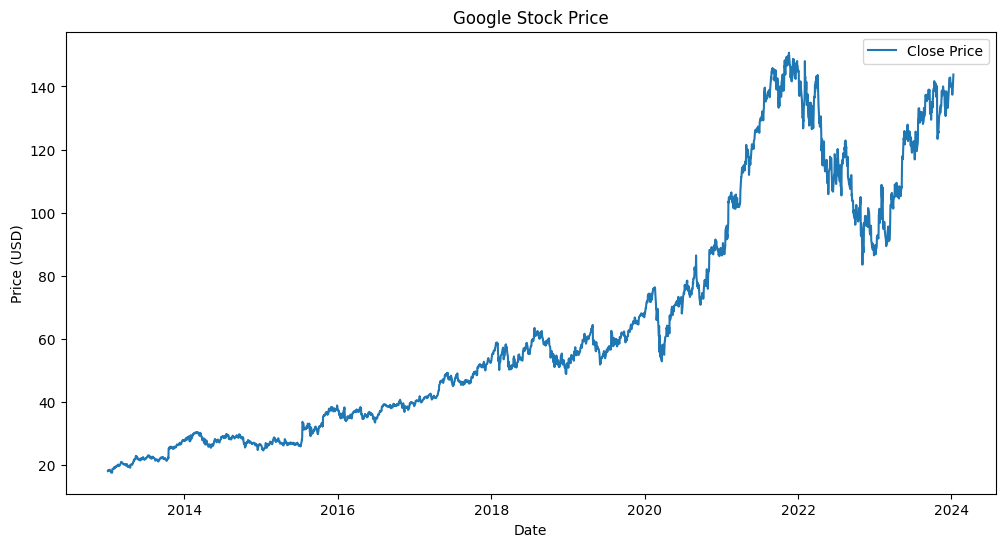

In [17]:

# Load the dataset
data = pd.read_csv('train.csv')  # Replace 'path/to/google_stock_price_dataset.csv' with the actual path
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [2]:

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]


In [3]:

# Function to create dataset
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [4]:

# Set time step for the RNN
time_step = 60

# Create training and testing datasets
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [5]:

# Build the RNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(units=50, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [7]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
68/68 [==============================] - 11s 156ms/step - loss: 0.0258 - val_loss: 0.0012
Epoch 2/10
68/68 [==============================] - 10s 154ms/step - loss: 0.0176 - val_loss: 0.0027
Epoch 3/10
68/68 [==============================] - 11s 170ms/step - loss: 0.0127 - val_loss: 6.5187e-04
Epoch 4/10
68/68 [==============================] - 11s 157ms/step - loss: 0.0100 - val_loss: 0.0042
Epoch 5/10
68/68 [==============================] - 11s 159ms/step - loss: 0.0079 - val_loss: 0.0034
Epoch 6/10
68/68 [==============================] - 10s 148ms/step - loss: 0.0071 - val_loss: 0.0021
Epoch 7/10
68/68 [==============================] - 10s 152ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 8/10
68/68 [==============================] - 11s 161ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 9/10
68/68 [==============================] - 11s 163ms/step - loss: 0.0047 - val_loss: 0.0075
Epoch 10/10
68/68 [==============================] - 11s 162ms/step - loss: 0.0041 - va

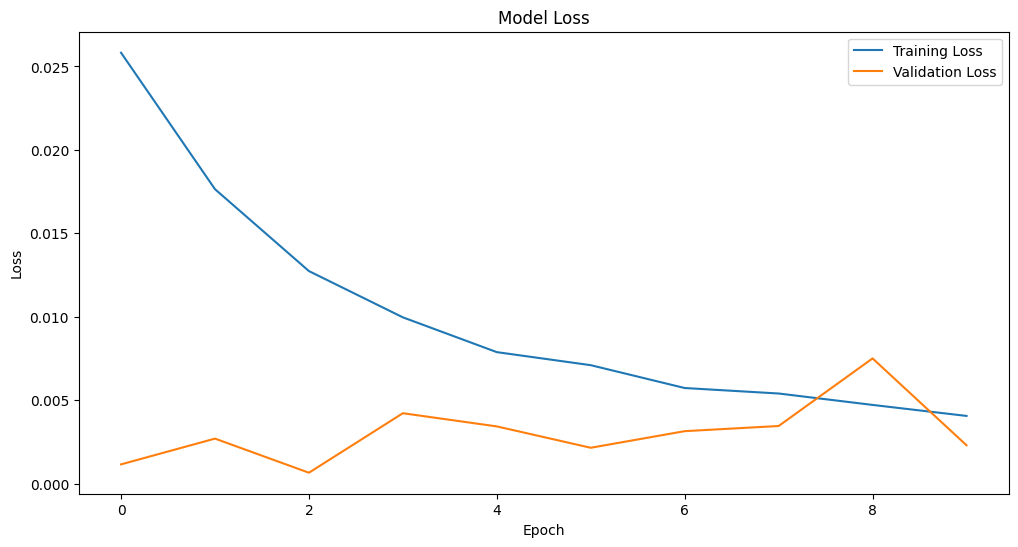

In [8]:

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)



16/16 [==============================] - 0s 16ms/step
Train RMSE: 0.01706802921792504
Test RMSE: 0.047934540775640015
